In [2]:
import os

# 1. Veamos dónde estamos parados
print("Estoy trabajando en la carpeta:", os.getcwd())

# 2. Intentemos listar qué hay dentro de la carpeta data
ruta_datos = '../data'

try:
    archivos = os.listdir(ruta_datos)
    print("\n¡ÉXITO! Encontré la carpeta 'data'. Los archivos dentro son:")
    for archivo in archivos:
        print(f" - {archivo}")
except FileNotFoundError:
    print("\nERROR: No encuentro la carpeta '../data'.")
    print("Verifica si la carpeta data está en la raíz y tú estás dentro de 01_data_understanding.")

Estoy trabajando en la carpeta: c:\Users\Domi\Documents\GitHub\examen-ml-riesgo-credito\01_data_understanding

¡ÉXITO! Encontré la carpeta 'data'. Los archivos dentro son:
 - application_.parquet
 - bureau.parquet
 - bureau_balance.parquet
 - credit_card_balance.parquet
 - HomeCredit_columns_description.parquet
 - installments_payments.parquet
 - POS_CASH_balance.parquet
 - previous_application.parquet


--- ¡DATOS CARGADOS CON ÉXITO! ---
Total clientes: 307511
Total variables: 122


C:\Users\Domi\AppData\Local\Temp\ipykernel_15368\886313496.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TARGET', data=df, palette='viridis')


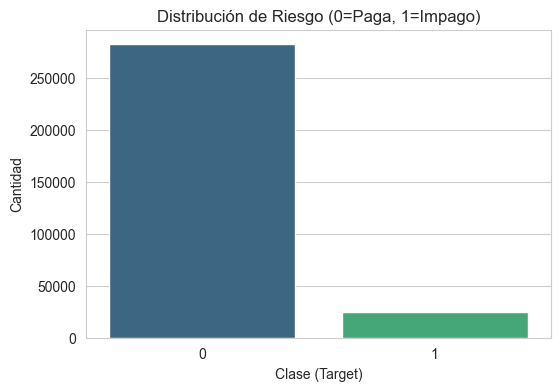


Porcentajes de la clase objetivo:
TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

Top 10 columnas con más datos faltantes:
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
COMMONAREA_MEDI             214865
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_AVG        210199
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_MODE       210199
dtype: int64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración estética
sns.set_style("whitegrid")

# --- CORRECCIÓN AQUÍ ---
# Usamos el nombre exacto que encontró tu diagnóstico: 'application_.parquet'
file_path = '../data/application_.parquet'

if os.path.exists(file_path):
    # Cargar datos
    df = pd.read_parquet(file_path, engine='pyarrow')
    print("--- ¡DATOS CARGADOS CON ÉXITO! ---")
    print(f"Total clientes: {df.shape[0]}")
    print(f"Total variables: {df.shape[1]}")
    
    # 2. Análisis del Objetivo (TARGET) - Requisito del examen
    plt.figure(figsize=(6, 4))
    sns.countplot(x='TARGET', data=df, palette='viridis')
    plt.title('Distribución de Riesgo (0=Paga, 1=Impago)')
    plt.xlabel('Clase (Target)')
    plt.ylabel('Cantidad')
    plt.show()

    # Calcular porcentaje exacto
    target_counts = df['TARGET'].value_counts(normalize=True) * 100
    print("\nPorcentajes de la clase objetivo:")
    print(target_counts)
    
    # 3. Revisar Nulos
    null_counts = df.isnull().sum().sort_values(ascending=False).head(10)
    print("\nTop 10 columnas con más datos faltantes:")
    print(null_counts)
    
else:
    print(f"ERROR AÚN: No encuentro {file_path}")